# Linear Regression Analysis

There is information about 50 Startups' spending on research and travel, spending on management, spending on marketing, the amount of profit they earned and the location where they were established. The objective can take the profit power estimate. This is a numerical estimation problem and our dependent variable is "Profit".

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Let's assign our dataframe in the directory to the startups variable. Let's start using the startups variable by copying it to the df variable.

In [4]:
startups  = pd.read_csv("50_Startups.csv")
df = startups.copy()

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Let's display the information of the data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Let's display how many observations and attributes it consists of.

In [7]:
df.shape

(50, 5)

Let's check for missing data.

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Let's plot the correlation matrix.

In [9]:
df.corr()

/tmp/ipykernel_6758/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Let's plot the heatmap of the correlation matrix with Seaborn.

/tmp/ipykernel_6758/2460615548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


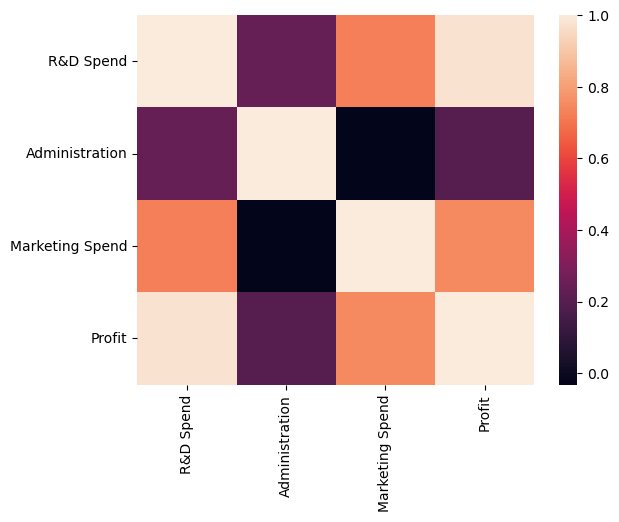

In [10]:
sns.heatmap(df.corr());

Let's draw a scatterplot to better see the correlation between R&D Spend and Profit.

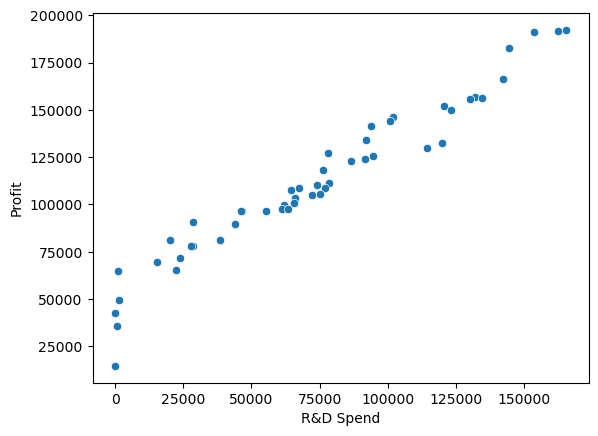

In [11]:
sns.scatterplot(x = "R&D Spend", y = "Profit", data = df);

Let's plot a histogram over df to see the distribution of numerical variables.

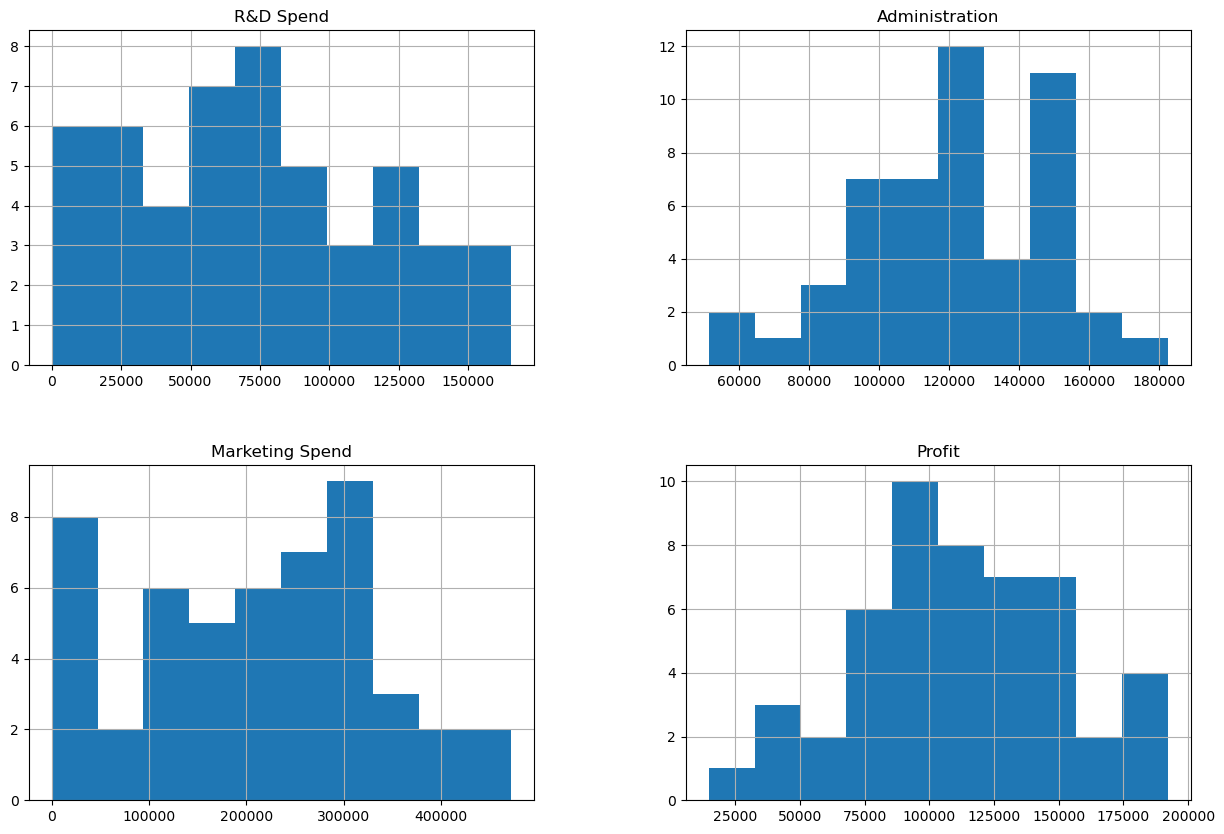

In [12]:
df.hist(figsize =(15,10))
plt.show()

Let's display the key statistics values of the data frame.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


Let's display the unique values of the State.

In [14]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Let's make categorical attribute inferences for State with the help of get_dummies. Because States do not have superiority over each other, they are nominals. It's not ordinal.

In [15]:
df_State = pd.get_dummies(df["State"])

In [16]:
df_State.columns = ['California','Florida','New York']

In [17]:
df_State.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


Let's update our dataframe by deleting the State attribute and excluding one of the States created as dummy.

In [18]:
df.drop(["State"], axis=1 , inplace =True)
df=pd.concat([df,df_State],axis=1)
df.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [19]:
df.drop(["Florida"], axis=1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


Let's divide our data frame into dependent and independent variables.

In [20]:
x = df.drop("Profit", axis = 1)
y = df["Profit"] 

Let's check the dependent and independent variables.

In [21]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [22]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Let's create 4 parts, train and test, from these dependent and independent variables. Let's use train_test_split to do this.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 45)

Let's check the 4 part variables.

In [24]:
x_train

,R&D Spend,Administration,Marketing Spend,California,New York
20,76253.86,113867.30,298664.47,1,0
18,91749.16,114175.79,294919.57,0,0
16,78013.11,121597.55,264346.06,1,0
40,28754.33,118546.05,172795.67,1,0
44,22177.74,154806.14,28334.72,1,0
36,28663.76,127056.21,201126.82,0,0
49,0.00,116983.80,45173.06,1,0
25,64664.71,139553.16,137962.62,1,0
46,1315.46,115816.21,297114.46,0,0
48,542.05,51743.15,0.00,0,1


In [25]:
x_test

,R&D Spend,Administration,Marketing Spend,California,New York
47,0.00,135426.92,0.00,1,0
7,130298.13,145530.06,323876.68,0,0
2,153441.51,101145.55,407934.54,0,0
9,123334.88,108679.17,304981.62,1,0
5,131876.90,99814.71,362861.36,0,1
26,75328.87,144135.98,134050.07,0,0
13,91992.39,135495.07,252664.93,1,0
37,44069.95,51283.14,197029.42,1,0
0,165349.20,136897.80,471784.10,0,1
19,86419.70,153514.11,0.00,0,1


In [26]:
y_train

20    118474.03
18    124266.90
16    126992.93
40     78239.91
44     65200.33
36     90708.19
49     14681.40
25    107404.34
46     49490.75
48     35673.41
45     64926.08
41     77798.83
27    105008.31
22    110352.25
29    101004.64
10    146121.95
28    103282.38
33     96778.92
39     81005.76
42     71498.49
6     156122.51
17    125370.37
43     69758.98
24    108552.04
34     96712.80
12    141585.52
38     81229.06
23    108733.99
8     152211.77
14    132602.65
1     191792.06
15    129917.04
4     166187.94
35     96479.51
21    111313.02
31     97483.56
32     97427.84
3     182901.99
30     99937.59
11    144259.40
Name: Profit, dtype: float64

In [27]:
y_test

47     42559.73
7     155752.60
2     191050.39
9     149759.96
5     156991.12
26    105733.54
13    134307.35
37     89949.14
0     192261.83
19    122776.86
Name: Profit, dtype: float64

Let's include LinearRegression in the kernel and build the model.

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Let's give the training data generated from the dependent and independent variables to train the model.

In [29]:
lm.fit(x_train, y_train)

LinearRegression()

Let's make the model predict the dependent test variable that it has not seen before. Let's assign these prediction values ​​to the y_pred variable.

In [30]:
y_pred=lm.predict(x_test) 
y_pred

array([ 46680.66228472, 159954.35005297, 182022.90173146, 154745.13158053,
       163287.16342377, 110489.74232995, 127548.46548019,  89813.9613669 ,
       192305.22120805, 114784.70582437])

Let's collect the estimates and actual values ​​in a data frame and take a look at it.

In [31]:
df = pd.DataFrame({"Gerçek veriler" : y_test, "Tahmin edilen veriler" : y_pred})
df

,Gerçek veriler,Tahmin edilen veriler
47,42559.73,46680.662285
7,155752.60,159954.350053
2,191050.39,182022.901731
9,149759.96,154745.131581
5,156991.12,163287.163424
26,105733.54,110489.742330
13,134307.35,127548.465480
37,89949.14,89813.961367
0,192261.83,192305.221208
19,122776.86,114784.705824


Let's include the metrics hosted by sklearn in the kernel and display the MAE, MSE, RMSE values.

In [32]:
import sklearn.metrics as metrics
import math

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("Mean Absolute Error (MAE):",mae) 
print("Mean Squared Error (MSE):", mse) 
print("Root Mean Squared Error (RMSE):", rmse) 

Mean Absolute Error (MAE): 4831.719647707153
Mean Squared Error (MSE): 31282309.430514224
Root Mean Squared Error (RMSE): 5593.059040499593


Let's print the R Squared value of the model over the training data.

In [33]:
print("R Squared=", lm.score(x_train, y_train))

R Squared= 0.9335592411497009
